In [1]:
import pandas as pd

In [2]:
loan_dt = pd.read_csv('/content/loan_data.csv')

In [3]:
loan_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_dt.shape

(614, 13)

In [5]:
loan_dt.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
loan_dt.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



> # **First check data Types**




In [7]:
loan_dt.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


## > **Imputing the Missing values (Categorical Values)**














In [8]:
loan_dt['Gender'].fillna(loan_dt['Gender'].mode()[0], inplace=True)
loan_dt['Married'].fillna(loan_dt['Married'].mode()[0], inplace=True)
loan_dt['Dependents'].fillna(loan_dt['Dependents'].mode()[0], inplace=True)
loan_dt['Self_Employed'].fillna(loan_dt['Self_Employed'].mode()[0], inplace=True)


## > **Imputing the Missing values (Numerics Values)**


In [9]:
loan_dt['LoanAmount'].fillna(loan_dt['LoanAmount'].mean(), inplace=True)
loan_dt['Loan_Amount_Term'].fillna(loan_dt['Loan_Amount_Term'].mean(), inplace=True)
loan_dt['Credit_History'].fillna(loan_dt['Credit_History'].mean(), inplace=True)

In [10]:
loan_dt.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64



> Converting the Categorical Values into Numeric values



In [11]:
from sklearn import preprocessing
Label_Encoder = preprocessing.LabelEncoder()
loan_dt['Gender'] = Label_Encoder.fit_transform(loan_dt['Gender'])
loan_dt['Married'] = Label_Encoder.fit_transform(loan_dt['Married'])
loan_dt['Dependents'] = Label_Encoder.fit_transform(loan_dt['Dependents'])
loan_dt['Education'] = Label_Encoder.fit_transform(loan_dt['Education'])
loan_dt['Property_Area'] = Label_Encoder.fit_transform(loan_dt['Education'])
loan_dt['Loan_Status'] = Label_Encoder.fit_transform(loan_dt['Loan_Status'])
loan_dt['Self_Employed'] = Label_Encoder.fit_transform(loan_dt['Self_Employed'])

In [12]:
loan_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1


In [13]:
loan_dt.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object



> Putting Value in the same scale



In [14]:
for i in loan_dt.columns[1:]:
  loan_dt[i] = (loan_dt[i] - loan_dt[i].min()) / (loan_dt[i].max() - loan_dt[i].min() )

In [15]:
loan_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.0,1.0
1,LP001003,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.0,1.0
3,LP001006,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.0,1.0


In [17]:
loan_dt.to_csv('Prediction_data_for_loan.csv', index=False)



> Importing some more importing Libraries 



In [61]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
pred_data = pd.read_csv('Prediction_data_for_loan.csv')

In [63]:
pred_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.0,1.0
1,LP001003,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.0,1.0
3,LP001006,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.0,1.0


In [64]:
pred_data = pred_data.drop('Loan_ID', axis=1)

In [65]:
X = pred_data.drop('Loan_Status', axis=1)
Y = pred_data['Loan_Status']

In [66]:
X.shape, Y.shape

((614, 11), (614,))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify = loan_dt['Loan_Status'], random_state=10, test_size=0.22)

In [68]:
import keras
from keras.models import Sequential 
from keras.layers import Input, Dense
import tensorflow as tf

In [69]:
X_train.shape

(478, 11)

In [70]:
input_size = X_train.shape[1]
print(input_size)
output_size = 1

11


In [71]:
model = Sequential ([
        Input(shape=(input_size,)),
        Dense(units=20, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10 , activation='relu'),
        Dense(units=5 , activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    


In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                240       
                                                                 
 dense_22 (Dense)            (None, 15)                315       
                                                                 
 dense_23 (Dense)            (None, 10)                160       
                                                                 
 dense_24 (Dense)            (None, 5)                 55        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 15ms/step - loss: 0.6767 - accuracy: 0.6799 - val_loss: 0.6638 - val_accuracy: 0.6838
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6472 - accuracy: 0.6883 - val_loss: 0.6368 - val_accuracy: 0.6838
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6212 - accuracy: 0.6883 - val_loss: 0.6126 - val_accuracy: 0.6838
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5992 - accuracy: 0.6883 - val_loss: 0.6004 - val_accuracy: 0.6838
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5883 - accuracy: 0.6883 - val_loss: 0.5925 - val_accuracy: 0.6838
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5772 - accuracy: 0.6883 - val_loss: 0.5838 - val_accuracy: 0.6838
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5666 - accuracy: 0.6883 - val_loss: 0.5745 - val_accuracy: 0.6838
Epoch 8/100


In [75]:
pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


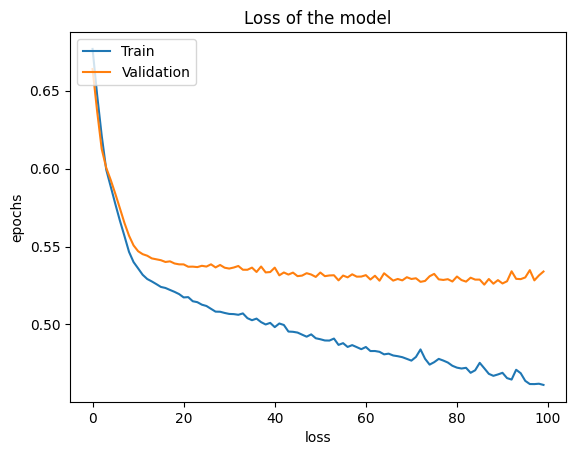

In [76]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Loss of the model")
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

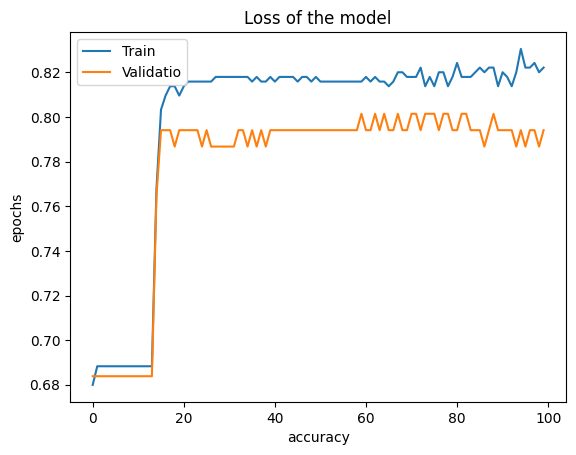

In [77]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Loss of the model")
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend(['Train', 'Validatio'], loc='upper left')
plt.show()